# Cabecera

## Ejercicio 2 — Actividad Tratamiento de datos de viento
**Asignatura:** Metodología de la I+d y Documentación Científica  
**Autor:** Santiago Santana Martínez  
**Fecha:** 14 de enero de 2026  
**Entorno:** Jupyter Notebook (Python 3)

---

## Configuración del Entorno

### Librerías Requeridas
- **numpy, pandas:** Manipulación y análisis numérico de datos
- **scipy.stats (weibull_min):** Distribuciones estadísticas y ajuste paramétrico
- **matplotlib.pyplot:** Visualización de datos
- **windrose** (opcional): Rosa de vientos estandarizada

In [18]:
import numpy as np
import pandas as pd
import os
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Intento de importar windrose (librería opcional para rosa de vientos estándar)
try:
    from windrose import WindroseAxes
    HAS_WINDROSE = True
except ImportError:
    HAS_WINDROSE = False

# Configuración de matplotlib
plt.rcParams["figure.figsize"] = (13, 6)
plt.rcParams["font.size"] = 10

print("- Entorno configurado correctamente")
print(f"- windrose disponible: {'Sí' if HAS_WINDROSE else 'No'}")

- Entorno configurado correctamente
- windrose disponible: Sí


## 2. Carga e Inspección de Datos en Bruto

### 2.1 Detección y Carga de Ficheros

Se realiza una búsqueda automática de ficheros con extensión `.xls` en el directorio de trabajo. Cada fichero se carga en memoria sin ningún procesamiento previo, preservando la estructura original de los datos tal como existen en las fuentes.

In [19]:
DATA_DIR = "."

xls_files = sorted([f for f in os.listdir(DATA_DIR) if f.lower().endswith(".xls")])

print("\n" + "="*90)
print("DETECCIÓN DE FICHEROS DE DATOS")
print("="*90)
print(f"\nDirectorio: {os.path.abspath(DATA_DIR)}")
print(f"Ficheros .xls detectados: {len(xls_files)}\n")

if xls_files:
    for i, f in enumerate(xls_files, 1):
        file_path = os.path.join(DATA_DIR, f)
        file_size = os.path.getsize(file_path) / 1024  # en KB
        print(f"  {i}. {f:<50} ({file_size:.1f} KB)")
else:
    print("No se encontraron ficheros .xls en el directorio actual.")
    print("Asegúrate de que los archivos estén disponibles en el mismo directorio.")


DETECCIÓN DE FICHEROS DE DATOS

Directorio: c:\Users\santu\Desktop\Documentos ULPGC\Master\Asignaturas\Primer Semestre\MID\Bloque 3\MID_Bloque_3_Trabajo\Actividad_Tratamiento_de_datos_de_viento
Ficheros .xls detectados: 3

  1. 2023_01.xls                                        (178.5 KB)
  2. 2024_01.xls                                        (174.5 KB)
  3. 2025_01.xls                                        (174.5 KB)


### 2.2 Inspección Visual de la Estructura

**Objetivo:** Visualizar la estructura bruta de los datos sin transformación alguna para identificar anomalías, valores faltantes, y esquema de columnas. Esta etapa es crítica para comprender la calidad de los datos y planificar estrategias de estandarización.

Información a inspeccionar:
- Dimensiones (número de filas y columnas)
- Primeras y últimas observaciones (continuidad temporal)
- Nombres y tipos de datos de las columnas
- Conteo de valores faltantes (NaN) por columna
- Estadísticas descriptivas de variables numéricas

In [ ]:
print("\n" + "="*90)
print("INSPECCIÓN VISUAL DE ESTRUCTURA DE DATOS EN BRUTO")
print("="*90)
print("\nCargando ficheros...\n")

def data_info(name, df):
    print("="*90)
    print(f"\nDETALLES DEL FICHERO: {name}")
    print("="*90)
    print(f"\n  Dimensiones: {df.shape[0]} × {df.shape[1]}")
    print(f"\n  PRIMERAS 10 FILAS:\n")
    display(df.head(10))
    
    print(f"\n\n  ÚLTIMAS 5 FILAS:\n")
    display(df.tail(5))
    
    print(f"\n\n  ESQUEMA DE COLUMNAS:")
    print(f"  {'Columna':<30} {'Tipo de Dato':<15}")
    print(f"  {'-'*45}")
    for col in df.columns:
        print(f"  {str(col):<30} {str(df[col].dtype):<15}")
    
    print(f"\n\n  CONTEO DE VALORES FALTANTES (NaN):")
    print(f"  {'Columna':<30} {'Faltantes':<10} {'%':<8}")
    print(f"  {'-'*48}")
    for col in df.columns:
        n_na = df[col].isna().sum()
        pct = 100 * n_na / len(df)
        print(f"  {str(col):<30} {n_na:<10} {pct:.1f}%")
    
    print(f"\n\n  ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS:\n")
    display(df.describe())

datasets = {}
for f in xls_files:
    path = os.path.join(DATA_DIR, f)
    try:
        df = pd.read_excel(path, engine="xlrd")
        datasets[f] = df
        print(f"Cargado correctamente: {f}: {df.shape[0]:5d} filas × {df.shape[1]:2d} columnas")
    except Exception as e:
        print(f"Error al cargar {f}: {e}")

if not datasets:
    print("\nNo se pudieron cargar ficheros. Verifica que xlrd esté instalado.")
    print("  Instala con: pip install xlrd")
else:
    print(f"\nTotal de ficheros cargados: {len(datasets)}\n")
    
    # Detalles de los ficheros
    for file_name, file_df in datasets.items():
        data_info(file_name, file_df)


INSPECCIÓN VISUAL DE ESTRUCTURA DE DATOS EN BRUTO

Cargando ficheros...

Cargado correctamente: 2023_01.xls:   744 filas × 15 columnas
Cargado correctamente: 2024_01.xls:   719 filas × 15 columnas
Cargado correctamente: 2025_01.xls:   720 filas × 15 columnas

Total de ficheros cargados: 3


DETALLES DEL FICHERO: 2023_01.xls

  Dimensiones: 744 × 15

  PRIMERAS 10 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
0,31/01/2023,23Z,15.0,78%,1022.0 Hpa,340º (N),13.0,-,-,-,-,-,-,-,Precipitacion
1,31/01/2023,22Z,14.5,83%,1021.6 Hpa,340º (N),16.6,-,-,-,-,-,-,-,Precipitacion
2,31/01/2023,21Z,15.4,79%,1021.5 Hpa,320º (NW),16.6,6/8,6/8 CU/ST,N/D,N/D,-,-,-,"Nuboso, lluvia intermitente"
3,31/01/2023,20Z,15.8,64%,1020.8 Hpa,340º (N),13.0,-,-,-,-,-,-,-,-
4,31/01/2023,19Z,16.8,59%,1020.8 Hpa,360º (N),22.3,-,-,-,-,-,-,-,-
5,31/01/2023,18Z,17.7,55%,1020.5 Hpa,360º (N),27.7,2/8,2/8 SC,-,-,-,20.3,-,Algunas nubes
6,31/01/2023,17Z,18.4,51%,1020.5 Hpa,10º (N),29.5,-,-,-,-,-,-,-,-
7,31/01/2023,16Z,18.1,56%,1020.6 Hpa,20º (N),25.9,-,-,-,-,-,-,-,-
8,31/01/2023,15Z,18.2,56%,1020.8 Hpa,20º (N),22.3,4/8,4/8 CU/ST,-,-,-,-,-,Nubes dispersas
9,31/01/2023,14Z,18.2,60%,1021.2 Hpa,30º (NE),22.3,-,-,-,-,-,-,-,-




  ÚLTIMAS 5 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
739,01/01/2023,04Z,17.5,88%,1021.7 Hpa,250º (W),7.6,-,-,-,-,-,-,-,-
740,01/01/2023,03Z,17.2,86%,1022.2 Hpa,0º (N),0.0,2/8,2/8 SC,-,-,-,-,-,Algunas nubes
741,01/01/2023,02Z,16.7,84%,1022.4 Hpa,240º (SW),7.6,-,-,-,-,-,-,-,-
742,01/01/2023,01Z,16.5,84%,1022.6 Hpa,160º (S),3.6,-,-,-,-,-,-,-,-
743,01/01/2023,00Z,17.7,85%,1023.1 Hpa,210º (SW),7.6,0/8,-,-,-,-,-,-,Despejado




  ESQUEMA DE COLUMNAS:
  Columna                        Tipo de Dato   
  ---------------------------------------------
  Fecha                          object         
  Hora UTC                       object         
  Temp. (ºC)                     float64        
  H.Rel (%)                      object         
  Presion/ Geopot.               object         
  Dir. vi.                       object         
  Vel. vi. (Km/h)                float64        
  Nub.                           object         
  Nubes bajas                    object         
  Nubes medias                   object         
  Nubes altas                    object         
  Prec. (mm)                     object         
  T. max (ºC)                    object         
  T. min (ºC)                    object         
  Situacion                      object         


  CONTEO DE VALORES FALTANTES (NaN):
  Columna                        Faltantes  %       
  ------------------------------------------------


,Temp. (ºC),Vel. vi. (Km/h)
count,744.000000,744.000000
mean,18.679301,23.796237
std,1.891705,9.302421
min,13.800000,0.000000
25%,17.400000,16.600000
50%,18.400000,22.300000
75%,20.000000,31.300000
max,24.000000,50.000000



DETALLES DEL FICHERO: 2024_01.xls

  Dimensiones: 719 × 15

  PRIMERAS 10 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
0,30/01/2024,23Z,17.6,35%,1023.7 Hpa,360º (N),13.0,-,-,-,-,-,-,-,-
1,30/01/2024,22Z,18.3,33%,1023.7 Hpa,340º (N),11.2,-,-,-,-,-,-,-,-
2,30/01/2024,21Z,19.1,58%,1023.5 Hpa,350º (N),5.4,0/8,-,-,-,-,-,-,Despejado
3,30/01/2024,20Z,19.9,63%,1022.9 Hpa,330º (NW),7.6,-,-,-,-,-,-,-,-
4,30/01/2024,19Z,21.2,61%,1022.4 Hpa,50º (NE),5.4,-,-,-,-,-,-,-,-
5,30/01/2024,18Z,22.2,56%,1022.5 Hpa,80º (E),7.6,1/8,-,-,CS,-,26.9,-,Algunas nubes
6,30/01/2024,17Z,23.4,45%,1022.5 Hpa,100º (E),9.4,-,-,-,-,-,-,-,-
7,30/01/2024,16Z,24.5,34%,1022.5 Hpa,100º (E),7.6,-,-,-,-,-,-,-,-
8,30/01/2024,15Z,25.3,23%,1022.5 Hpa,100º (E),5.4,1/8,-,-,CS,-,-,-,Algunas nubes
9,30/01/2024,14Z,26.6,18%,1023.1 Hpa,120º (SE),5.4,-,-,-,-,-,-,-,-




  ÚLTIMAS 5 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
714,01/01/2024,04Z,16.2,58%,1019.4 Hpa,300º (NW),7.6,-,-,-,-,-,-,-,-
715,01/01/2024,03Z,16.4,62%,1019.6 Hpa,290º (W),5.4,0/8,-,-,-,-,-,-,Despejado
716,01/01/2024,02Z,17.2,63%,1020.1 Hpa,300º (NW),7.6,-,-,-,-,-,-,-,-
717,01/01/2024,01Z,17.3,58%,1020.2 Hpa,320º (NW),9.4,-,-,-,-,-,-,-,-
718,01/01/2024,00Z,17.3,62%,1020.5 Hpa,320º (NW),7.4,0/8,-,-,-,-,-,-,Despejado




  ESQUEMA DE COLUMNAS:
  Columna                        Tipo de Dato   
  ---------------------------------------------
  Fecha                          object         
  Hora UTC                       object         
  Temp. (ºC)                     float64        
  H.Rel (%)                      object         
  Presion/ Geopot.               object         
  Dir. vi.                       object         
  Vel. vi. (Km/h)                float64        
  Nub.                           object         
  Nubes bajas                    object         
  Nubes medias                   object         
  Nubes altas                    object         
  Prec. (mm)                     object         
  T. max (ºC)                    object         
  T. min (ºC)                    object         
  Situacion                      object         


  CONTEO DE VALORES FALTANTES (NaN):
  Columna                        Faltantes  %       
  ------------------------------------------------


,Temp. (ºC),Vel. vi. (Km/h)
count,714.000000,714.000000
mean,20.363165,15.381933
std,2.646727,9.505128
min,14.400000,0.000000
25%,18.400000,9.400000
50%,19.900000,13.000000
75%,21.900000,18.400000
max,30.700000,50.000000



DETALLES DEL FICHERO: 2025_01.xls

  Dimensiones: 720 × 15

  PRIMERAS 10 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
0,30/01/2025,23:00,18.9,57%,1030.7 Hpa,360º (N),31.3,-,-,-,-,-,-,-,-
1,30/01/2025,22:00,19.1,53%,1030.7 Hpa,20º (N),44.3,-,-,-,-,-,-,-,-
2,30/01/2025,21:00,19.2,55%,1030.1 Hpa,360º (N),37.1,6/8,6/8 Sc,N/D,N/D,-,-,-,Nuboso
3,30/01/2025,20:00,19.0,54%,1030.2 Hpa,10º (N),50.0,-,-,-,-,-,-,-,-
4,30/01/2025,19:00,19.6,55%,1029.7 Hpa,20º (N),53.6,-,-,-,-,-,-,-,-
5,30/01/2025,18:00,19.9,51%,1029.2 Hpa,360º (N),46.4,6/8,6/8 Sc,-,-,Ip(12h),22.5,-,Nuboso
6,30/01/2025,17:00,20.0,48%,1029.3 Hpa,10º (N),46.4,-,-,-,-,-,-,-,-
7,30/01/2025,16:00,20.3,55%,1029.1 Hpa,10º (N),50.0,-,-,-,-,-,-,-,-
8,30/01/2025,15:00,21.1,48%,1028.8 Hpa,20º (N),53.6,5/8,5/8 Sc,-,-,-,-,-,Nuboso
9,30/01/2025,14:00,21.9,46%,1029.2 Hpa,20º (N),59.4,-,-,-,-,-,-,-,-




  ÚLTIMAS 5 FILAS:



,Fecha,Hora UTC,Temp. (ºC),H.Rel (%),Presion/ Geopot.,Dir. vi.,Vel. vi. (Km/h),Nub.,Nubes bajas,Nubes medias,Nubes altas,Prec. (mm),T. max (ºC),T. min (ºC),Situacion
715,01/01/2025,04:00,16.8,68%,1024.2 Hpa,290º (W),13.0,-,-,-,-,-,-,-,-
716,01/01/2025,03:00,16.9,67%,1024.4 Hpa,300º (NW),13.0,1/8,1/8 Sc,-,-,-,-,-,Algunas nubes
717,01/01/2025,02:00,16.9,68%,1024.6 Hpa,310º (NW),13.0,-,-,-,-,-,-,-,-
718,01/01/2025,01:00,17.1,66%,1025.1 Hpa,310º (NW),13.0,-,-,-,-,-,-,-,-
719,01/01/2025,00:00,17.5,66%,1025.4 Hpa,310º (NW),13.0,1/8,1/8 Sc,-,-,-,-,-,Algunas nubes




  ESQUEMA DE COLUMNAS:
  Columna                        Tipo de Dato   
  ---------------------------------------------
  Fecha                          object         
  Hora UTC                       object         
  Temp. (ºC)                     float64        
  H.Rel (%)                      object         
  Presion/ Geopot.               object         
  Dir. vi.                       object         
  Vel. vi. (Km/h)                float64        
  Nub.                           object         
  Nubes bajas                    object         
  Nubes medias                   object         
  Nubes altas                    object         
  Prec. (mm)                     object         
  T. max (ºC)                    object         
  T. min (ºC)                    object         
  Situacion                      object         


  CONTEO DE VALORES FALTANTES (NaN):
  Columna                        Faltantes  %       
  ------------------------------------------------


,Temp. (ºC),Vel. vi. (Km/h)
count,720.000000,720.000000
mean,19.486806,20.335278
std,2.134355,11.601336
min,14.500000,0.000000
25%,17.900000,11.200000
50%,19.300000,18.400000
75%,21.225000,29.500000
max,24.900000,59.400000


### 2.3 Estandarización de Estructura de Datos

**Objetivo:** Crear un esquema de datos uniforme a partir de ficheros potencialmente heterogéneos.

**Justificación:** Los datos de tres años diferentes pueden poseer nombres de columnas inconsistentes o estructuras ligeramente distintas. Para permitir un análisis comparativo consistente, se implementa **detección automática de columnas críticas** basada en búsqueda de palabras clave (case-insensitive):

- **Columna temporal:** búsqueda de palabras clave ("fecha", "date", "datetime", "hora", "time")
- **Columna de velocidad:** búsqueda de ("vel", "speed", "viento", "wind speed")
- **Columna de dirección:** búsqueda de ("dir", "direccion", "wind dir")

La estandarización genera un DataFrame unificado con tres columnas: `timestamp`, `wind_speed`, `wind_dir`, ordenado cronológicamente. Este proceso conserva la integridad de los datos mientras habilita operaciones analíticas consistentes.

In [21]:
# Mapa de conversión Cardinal -> Grados
CARDINAL_TO_DEG = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

def convert_direction(series):
    def process_value(val):
        if pd.isna(val):
            return np.nan, np.nan
        
        val_str = str(val).strip()
        
        # 1. Intentar extraer número de formato "210º (SW)"
        import re
        match = re.search(r'(\d+)', val_str)
        if match:
            deg = int(match.group(1)) % 360
        else:
            # 2. Intentar conversión numérica directa
            try:
                deg = int(float(val_str)) % 360
            except (ValueError, TypeError):
                # 3. Intentar búsqueda de cardinal en texto
                val_upper = val_str.upper()
                deg = None
                for cardinal, d in CARDINAL_TO_DEG.items():
                    if cardinal in val_upper:
                        deg = d
                        break
                if deg is None:
                    return np.nan, np.nan
        
        # Encontrar cardinal más cercano (de 16 sectores)
        sector_size = 22.5
        sector_idx = round(deg / sector_size) % 16
        sector_labels = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", 
                         "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
        cardinal = sector_labels[sector_idx]
        
        return deg, cardinal
    
    result = series.apply(process_value)
    return result

def standardize_dataframe(df_raw, file_name=""):
    df = df_raw.copy()
    
    # Nombres de columnas conocidos (de la inspección visual)
    fecha_col = "Fecha"
    hora_col = "Hora UTC"
    speed_col = "Vel. vi. (Km/h)"
    dir_col = "Dir. vi."
    
    # 1. Construir timestamp combinando Fecha + Hora UTC
    try:
        date_str = df[fecha_col].astype(str).str.strip()
        hour_str = df[hora_col].astype(str).str.strip()
        ts = date_str + " " + hour_str
        df["timestamp"] = pd.to_datetime(ts, errors="coerce", dayfirst=True)
    except KeyError as e:
        raise ValueError(f"ERROR en {file_name}: Columna no encontrada: {e}")
    
    # 2. Velocidad: convertir de Km/h a m/s (factor: 1/3.6)
    try:
        df["wind_speed"] = pd.to_numeric(df[speed_col], errors="coerce") / 3.6
    except KeyError:
        raise ValueError(f"ERROR en {file_name}: No se encuentra columna '{speed_col}'")
    
    # 3. Dirección: extraer y convertir a grados y cardinal
    try:
        df["wind_dir"] = df[dir_col]
    except KeyError:
        raise ValueError(f"ERROR en {file_name}: No se encuentra columna '{dir_col}'")
    
    direction_conversions = convert_direction(df["wind_dir"])
    df["dir_deg"] = direction_conversions.apply(lambda x: x[0])
    df["dir_cardinal"] = direction_conversions.apply(lambda x: x[1])
    
    # Crear DataFrame estandarizado
    out = df[["timestamp", "wind_speed", "wind_dir", "dir_deg", "dir_cardinal"]].copy()
    out = out.sort_values("timestamp").reset_index(drop=True)
    
    # Calcular % válido de velocidades
    n_valid = out["wind_speed"].notna().sum()
    pct_valid = 100 * n_valid / len(out)
    
    metadata = {
        "file_name": file_name,
        "speed_col": speed_col,
        "dir_col": dir_col,
        "n_records": len(out),
        "n_valid_speed": n_valid,
        "pct_valid_speed": pct_valid,
        "n_valid_dir": out["wind_dir"].notna().sum()
    }

    display(out.head(3))
    
    return out, metadata

# Aplicar estandarización a todos los ficheros
print("\n" + "="*90)
print("ESTANDARIZACIÓN DE ESTRUCTURA DE DATOS")
print("="*90 + "\n")

std_datasets = {}
metadata_all = {}

for name, df in datasets.items():
    try:
        df_std, meta = standardize_dataframe(df, name)
        std_datasets[name] = df_std
        metadata_all[name] = meta
        
        print(f"- {name}")
        print(f"    Columnas utilizadas:")
        print(f"      Fecha: 'Fecha', Hora: 'Hora UTC'")
        print(f"      Velocidad: '{meta['speed_col']}' (convertido de Km/h a m/s)")
        print(f"      Dirección: '{meta['dir_col']}'")
        print(f"    Registros: {meta['n_records']} | Velocidades válidas: {meta['n_valid_speed']}/{meta['n_records']} ({meta['pct_valid_speed']:.1f}%)")
        print(f"    Direcciones válidas: {meta['n_valid_dir']}/{meta['n_records']} ({100*meta['n_valid_dir']/meta['n_records']:.1f}%)")
        
        # Debug: mostrar primeros valores
        print(f"    Primeros valores (timestamp, vel_m/s, dir°, dir_cardinal):")
        for idx in df_std.head(3).index:
            ts = df_std.loc[idx, "timestamp"]
            vel = df_std.loc[idx, "wind_speed"]
            deg = df_std.loc[idx, "dir_deg"]
            card = df_std.loc[idx, "dir_cardinal"]
            print(f"      {ts} | {vel:.2f} m/s | {deg:.0f}° | {card}")
        print()
    except Exception as e:
        print(f"- {name}: {e}\n")


ESTANDARIZACIÓN DE ESTRUCTURA DE DATOS



,timestamp,wind_speed,wind_dir,dir_deg,dir_cardinal
0,2023-01-01 00:00:00+00:00,2.111111,210º (SW),210,SSW
1,2023-01-01 01:00:00+00:00,1.000000,160º (S),160,SSE
2,2023-01-01 02:00:00+00:00,2.111111,240º (SW),240,WSW


- 2023_01.xls
    Columnas utilizadas:
      Fecha: 'Fecha', Hora: 'Hora UTC'
      Velocidad: 'Vel. vi. (Km/h)' (convertido de Km/h a m/s)
      Dirección: 'Dir. vi.'
    Registros: 744 | Velocidades válidas: 744/744 (100.0%)
    Direcciones válidas: 744/744 (100.0%)
    Primeros valores (timestamp, vel_m/s, dir°, dir_cardinal):
      2023-01-01 00:00:00+00:00 | 2.11 m/s | 210° | SSW
      2023-01-01 01:00:00+00:00 | 1.00 m/s | 160° | SSE
      2023-01-01 02:00:00+00:00 | 2.11 m/s | 240° | WSW



,timestamp,wind_speed,wind_dir,dir_deg,dir_cardinal
0,2024-01-01 00:00:00+00:00,2.055556,320º (NW),320,NW
1,2024-01-01 01:00:00+00:00,2.611111,320º (NW),320,NW
2,2024-01-01 02:00:00+00:00,2.111111,300º (NW),300,WNW


- 2024_01.xls
    Columnas utilizadas:
      Fecha: 'Fecha', Hora: 'Hora UTC'
      Velocidad: 'Vel. vi. (Km/h)' (convertido de Km/h a m/s)
      Dirección: 'Dir. vi.'
    Registros: 719 | Velocidades válidas: 714/719 (99.3%)
    Direcciones válidas: 719/719 (100.0%)
    Primeros valores (timestamp, vel_m/s, dir°, dir_cardinal):
      2024-01-01 00:00:00+00:00 | 2.06 m/s | 320° | NW
      2024-01-01 01:00:00+00:00 | 2.61 m/s | 320° | NW
      2024-01-01 02:00:00+00:00 | 2.11 m/s | 300° | WNW



,timestamp,wind_speed,wind_dir,dir_deg,dir_cardinal
0,2025-01-01 00:00:00,3.611111,310º (NW),310,NW
1,2025-01-01 01:00:00,3.611111,310º (NW),310,NW
2,2025-01-01 02:00:00,3.611111,310º (NW),310,NW


- 2025_01.xls
    Columnas utilizadas:
      Fecha: 'Fecha', Hora: 'Hora UTC'
      Velocidad: 'Vel. vi. (Km/h)' (convertido de Km/h a m/s)
      Dirección: 'Dir. vi.'
    Registros: 720 | Velocidades válidas: 720/720 (100.0%)
    Direcciones válidas: 720/720 (100.0%)
    Primeros valores (timestamp, vel_m/s, dir°, dir_cardinal):
      2025-01-01 00:00:00 | 3.61 m/s | 310° | NW
      2025-01-01 01:00:00 | 3.61 m/s | 310° | NW
      2025-01-01 02:00:00 | 3.61 m/s | 310° | NW



## 3. Estadísticos Descriptivos

### 3.1 Cálculo de Estadísticos Fundamentales

Se calculan los estadísticos descriptivos básicos de las velocidades de viento observadas, excluyendo valores faltantes. Los estadísticos incluyen:

$$\text{Media (μ)} = \frac{1}{n}\sum_{i=1}^{n} v_i$$

$$\text{Desviación Estándar (σ)} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (v_i - μ)^2}$$

$$\text{Rango:} \; v_{\min}, v_{\max}$$

Donde $v_i$ representa la velocidad de viento en la observación $i$, y $n$ es el número total de muestras válidas. Se utilizan quartiles (Q₁, mediana, Q₃) para caracterizar la distribución en percentiles estándar.

In [22]:
def compute_basic_stats(df_std):
    s = df_std["wind_speed"].dropna()
    if len(s) == 0:
        return None
    return {
        "n_valid": int(s.shape[0]),
        "n_total": int(len(df_std)),
        "mean": float(s.mean()),
        "std": float(s.std(ddof=1)),
        "min": float(s.min()),
        "q25": float(s.quantile(0.25)),
        "median": float(s.median()),
        "q75": float(s.quantile(0.75)),
        "max": float(s.max())
    }

print("\n" + "="*90)
print("CÁLCULO DE ESTADÍSTICOS DESCRIPTIVOS POR FICHERO")
print("="*90 + "\n")

stats_list = []
for name, df_std in std_datasets.items():
    st = compute_basic_stats(df_std)
    if st:
        st["Fichero"] = name
        stats_list.append(st)
        print(f"{name}:")
        print(f"  Media (μ):           {st['mean']:.3f} m/s")
        print(f"  Desv. Estándar (σ):  {st['std']:.3f} m/s")
        print(f"  Mínimo:              {st['min']:.3f} m/s")
        print(f"  Q₁ (25%):            {st['q25']:.3f} m/s")
        print(f"  Mediana:             {st['median']:.3f} m/s")
        print(f"  Q₃ (75%):            {st['q75']:.3f} m/s")
        print(f"  Máximo:              {st['max']:.3f} m/s")
        print(f"  Muestras válidas:    {st['n_valid']}/{st['n_total']} ({100*st['n_valid']/st['n_total']:.1f}%)\n")


CÁLCULO DE ESTADÍSTICOS DESCRIPTIVOS POR FICHERO

2023_01.xls:
  Media (μ):           6.610 m/s
  Desv. Estándar (σ):  2.584 m/s
  Mínimo:              0.000 m/s
  Q₁ (25%):            4.611 m/s
  Mediana:             6.194 m/s
  Q₃ (75%):            8.694 m/s
  Máximo:              13.889 m/s
  Muestras válidas:    744/744 (100.0%)

2024_01.xls:
  Media (μ):           4.273 m/s
  Desv. Estándar (σ):  2.640 m/s
  Mínimo:              0.000 m/s
  Q₁ (25%):            2.611 m/s
  Mediana:             3.611 m/s
  Q₃ (75%):            5.111 m/s
  Máximo:              13.889 m/s
  Muestras válidas:    714/719 (99.3%)

2025_01.xls:
  Media (μ):           5.649 m/s
  Desv. Estándar (σ):  3.223 m/s
  Mínimo:              0.000 m/s
  Q₁ (25%):            3.111 m/s
  Mediana:             5.111 m/s
  Q₃ (75%):            8.194 m/s
  Máximo:              16.500 m/s
  Muestras válidas:    720/720 (100.0%)



### 3.2 Tabla de Estadísticos Descriptivos

In [23]:
if stats_list:
    stats_df = pd.DataFrame(stats_list).set_index("Fichero")
    print("\nTABLA COMPARATIVA (todos los años):\n")
    display(stats_df[["n_valid", "mean", "std", "min", "median", "max"]].round(3))


TABLA COMPARATIVA (todos los años):



,n_valid,mean,std,min,median,max
Fichero,,,,,,
2023_01.xls,744,6.610,2.584,0.0,6.194,13.889
2024_01.xls,714,4.273,2.640,0.0,3.611,13.889
2025_01.xls,720,5.649,3.223,0.0,5.111,16.500


# 4. Iterar sobre cada fichero (año) para generar visualizaciones


ANÁLISIS TEMPORAL DE VELOCIDADES DE VIENTO

ANALIZANDO: 2023_01.xls



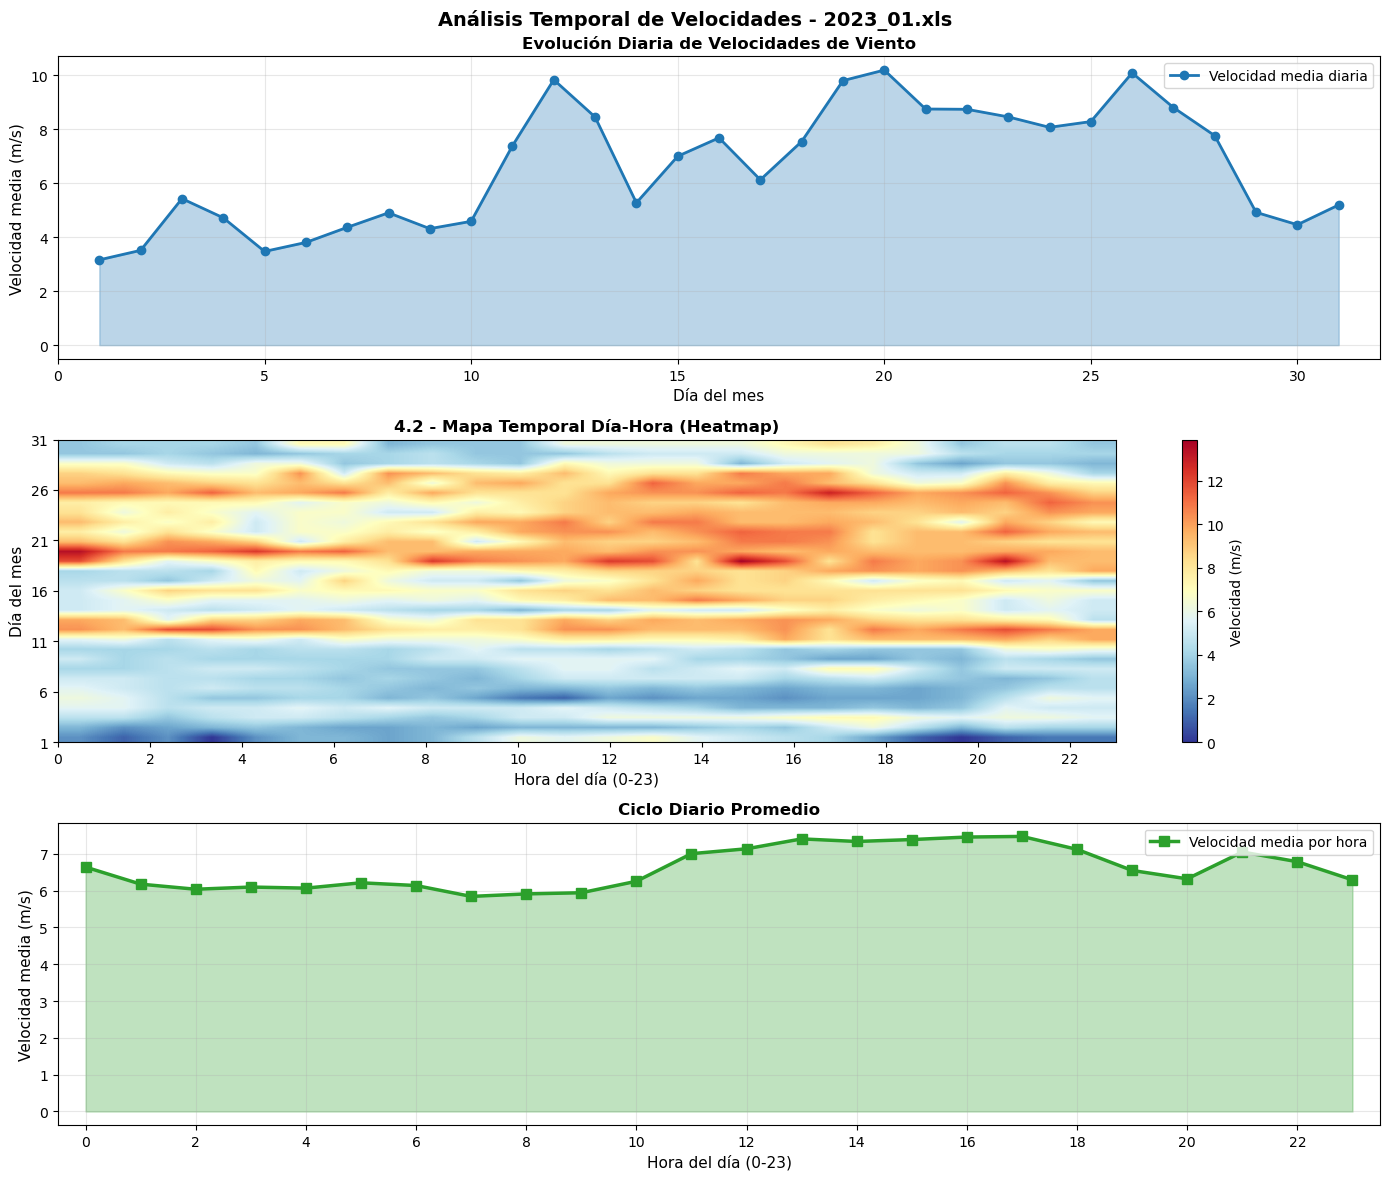

Velocidad media diaria (rango):  3.157 - 10.183 m/s
Día con mayor velocidad media:   Día 20 (10.183 m/s)
Día con menor velocidad media:   Día 1 (3.157 m/s)
Hora punta promedio (máx):       17h (7.473 m/s)
Hora de menor velocidad:         07h (5.843 m/s)


ANALIZANDO: 2024_01.xls



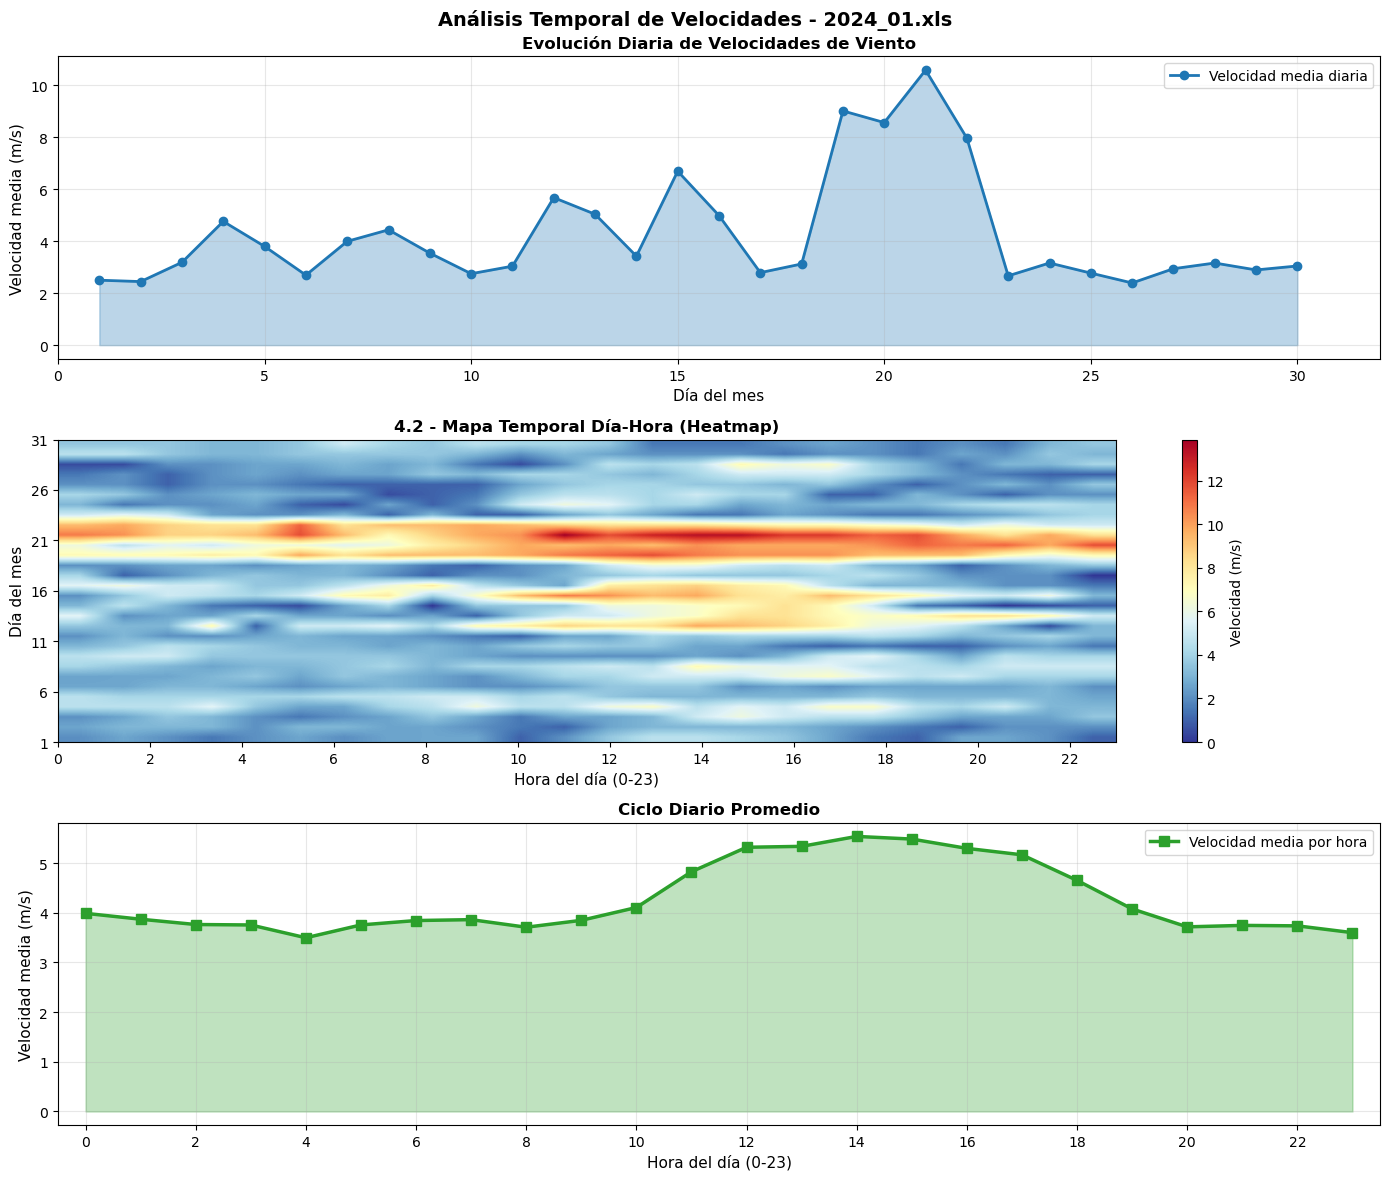

Velocidad media diaria (rango):  2.392 - 10.583 m/s
Día con mayor velocidad media:   Día 21 (10.583 m/s)
Día con menor velocidad media:   Día 26 (2.392 m/s)
Hora punta promedio (máx):       14h (5.539 m/s)
Hora de menor velocidad:         04h (3.498 m/s)


ANALIZANDO: 2025_01.xls



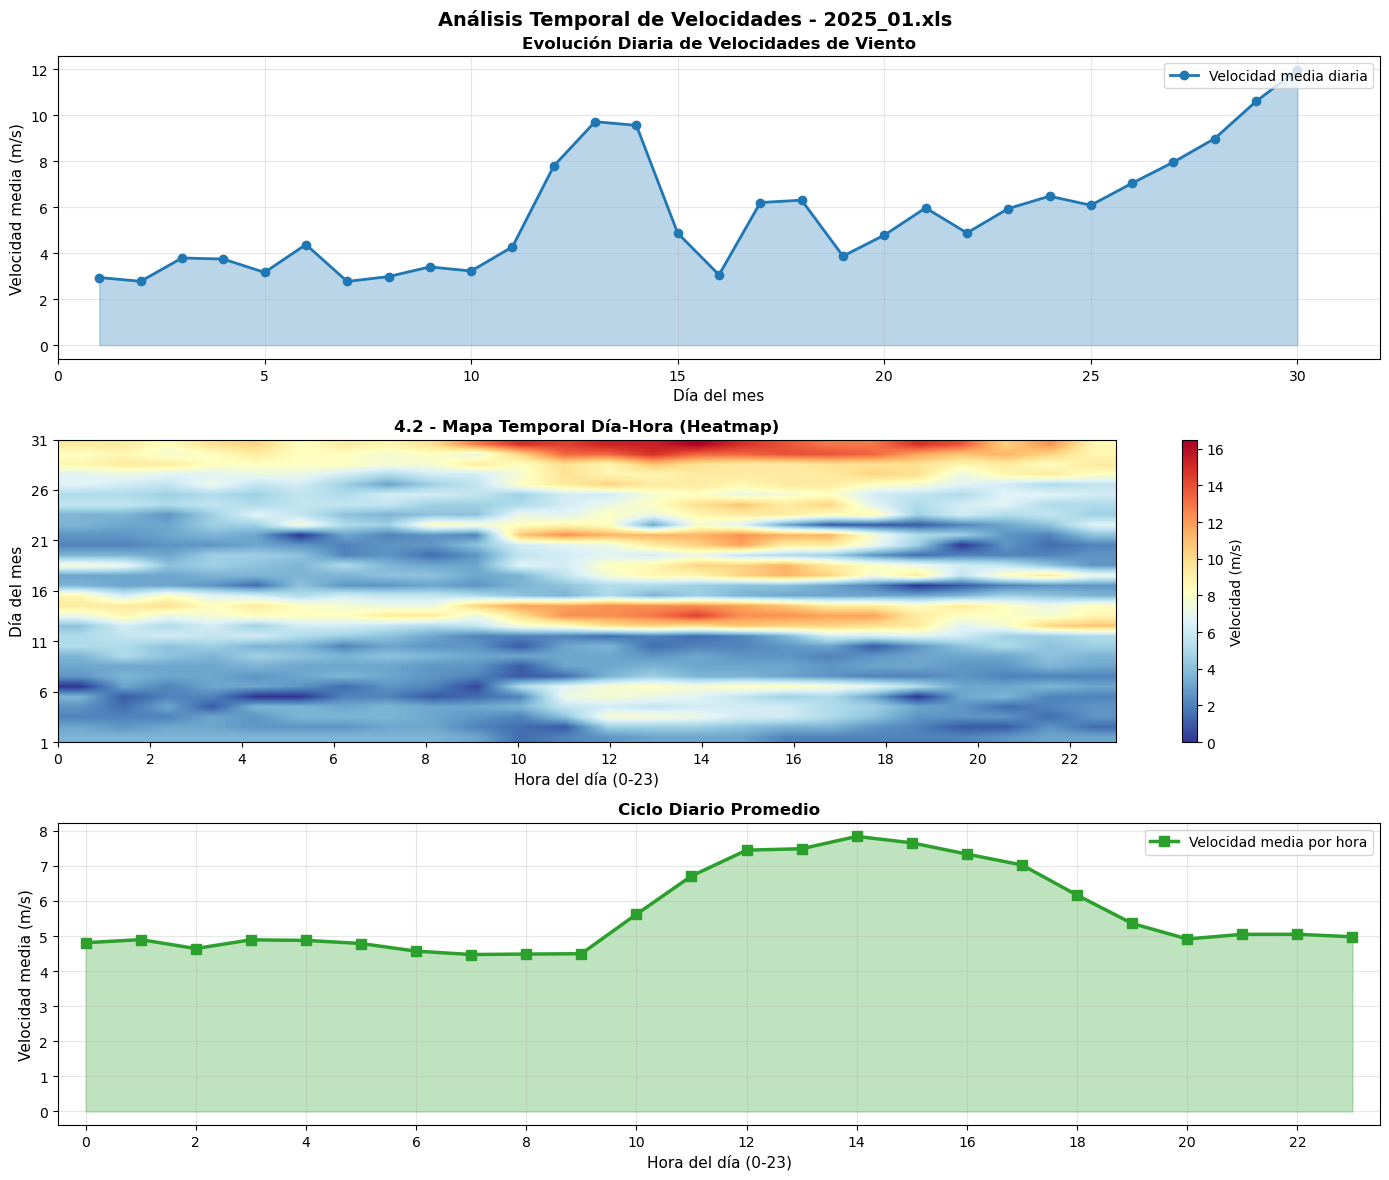

Velocidad media diaria (rango):  2.769 - 11.958 m/s
Día con mayor velocidad media:   Día 30 (11.958 m/s)
Día con menor velocidad media:   Día 7 (2.769 m/s)
Hora punta promedio (máx):       14h (7.839 m/s)
Hora de menor velocidad:         07h (4.473 m/s)



In [24]:
print("\n" + "="*90)
print("ANÁLISIS TEMPORAL DE VELOCIDADES DE VIENTO")
print("="*90)

for year_name, df_std in std_datasets.items():
    print(f"\nANALIZANDO: {year_name}\n")
    
    # Extraer información temporal
    df_std["day_of_month"] = df_std["timestamp"].dt.day
    df_std["hour"] = df_std["timestamp"].dt.hour
    
    # 4.1 - Evolución diaria (media por día)
    daily_mean = df_std.groupby("day_of_month")["wind_speed"].mean()
    
    # Crear figura con 3 subgráficos
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    fig.suptitle(f"Análisis Temporal de Velocidades - {year_name}", fontsize=14, fontweight='bold')
    
    # Gráfico 1: Velocidad media diaria
    ax1 = axes[0]
    ax1.plot(daily_mean.index, daily_mean.values, marker='o', linewidth=2, markersize=6, 
             color='#1f77b4', label='Velocidad media diaria')
    ax1.fill_between(daily_mean.index, daily_mean.values, alpha=0.3, color='#1f77b4')
    ax1.set_xlabel('Día del mes', fontsize=11)
    ax1.set_ylabel('Velocidad media (m/s)', fontsize=11)
    ax1.set_title('Evolución Diaria de Velocidades de Viento', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=10)
    ax1.set_xlim(0, 32)
    
    # 4.2 - Heatmap Día-Hora
    pivot_data = df_std.pivot_table(values='wind_speed', index='day_of_month', 
                                     columns='hour', aggfunc='mean')
    
    # Rellenar datos faltantes usando interpolación lineal (espacialmente suave)
    pivot_data_filled = pivot_data.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
    pivot_data_filled = pivot_data_filled.fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
    
    # Si aún hay NaN (ej: primero y último), rellenar con la media global
    if pivot_data_filled.isna().any().any():
        global_mean = df_std['wind_speed'].mean()
        pivot_data_filled = pivot_data_filled.fillna(global_mean)
    
    ax2 = axes[1]
    im = ax2.imshow(pivot_data_filled.values, aspect='auto', cmap='RdYlBu_r', origin='lower',
                    extent=[0, 23, 1, 31], interpolation='bilinear')
    ax2.set_xlabel('Hora del día (0-23)', fontsize=11)
    ax2.set_ylabel('Día del mes', fontsize=11)
    ax2.set_title('4.2 - Mapa Temporal Día-Hora (Heatmap)', fontsize=12, fontweight='bold')
    ax2.set_xticks(range(0, 24, 2))
    ax2.set_yticks(range(1, 32, 5))
    cbar = plt.colorbar(im, ax=ax2, label='Velocidad (m/s)')
    
    # 4.3 - Ciclo diario promedio
    hourly_mean = df_std.groupby("hour")["wind_speed"].mean()
    
    ax3 = axes[2]
    ax3.plot(hourly_mean.index, hourly_mean.values, marker='s', linewidth=2.5, markersize=7,
             color='#2ca02c', label='Velocidad media por hora')
    ax3.fill_between(hourly_mean.index, hourly_mean.values, alpha=0.3, color='#2ca02c')
    ax3.set_xlabel('Hora del día (0-23)', fontsize=11)
    ax3.set_ylabel('Velocidad media (m/s)', fontsize=11)
    ax3.set_title('Ciclo Diario Promedio', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim(-0.5, 23.5)
    ax3.set_xticks(range(0, 24, 2))
    ax3.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Resumen estadístico
    print(f"Velocidad media diaria (rango):  {daily_mean.min():.3f} - {daily_mean.max():.3f} m/s")
    print(f"Día con mayor velocidad media:   Día {daily_mean.idxmax()} ({daily_mean.max():.3f} m/s)")
    print(f"Día con menor velocidad media:   Día {daily_mean.idxmin()} ({daily_mean.min():.3f} m/s)")
    print(f"Hora punta promedio (máx):       {hourly_mean.idxmax():02d}h ({hourly_mean.max():.3f} m/s)")
    print(f"Hora de menor velocidad:         {hourly_mean.idxmin():02d}h ({hourly_mean.min():.3f} m/s)")
    print()

## 5. Análisis de Distribución de Velocidades

### 5.1 Histograma de Frecuencias

Se presenta la distribución empírica de velocidades mediante histograma de frecuencias normalizado (densidad). El histograma caracteriza:
- **Rango dinámico:** Amplitud de variación de velocidades
- **Modas:** Picos de frecuencia (velocidades más comunes)
- **Sesgo:** Asimetría de la distribución
- **Colas:** Presencia de eventos extremos

**Ecuación:** Para cada celda $[v_i, v_{i+1})$, se grafica $\frac{\text{frecuencia}}{\text{ancho de bin} \times n}$ como altura.


HISTOGRAMA DE FRECUENCIAS

ANALIZANDO: 2023_01.xls



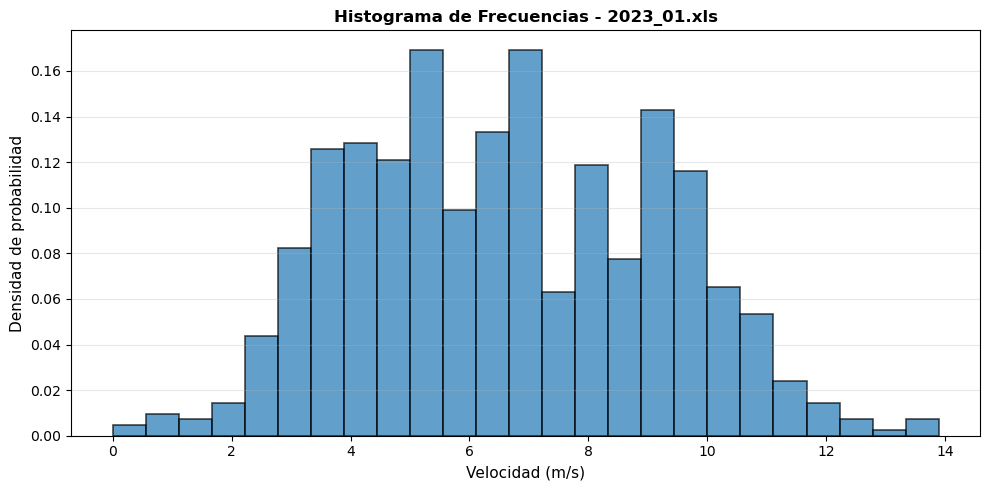

Rango dinámico:        0.000 - 13.889 m/s
Valor modal (bin más freq): ~5.00 m/s
Asimetría (skewness):  0.170
Curtosis (kurtosis):   -0.841


ANALIZANDO: 2024_01.xls



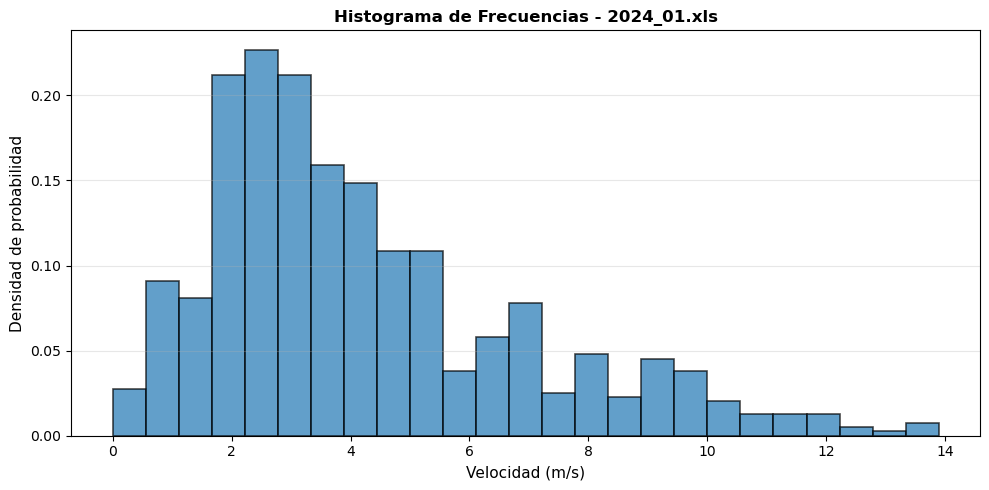

Rango dinámico:        0.000 - 13.889 m/s
Valor modal (bin más freq): ~2.22 m/s
Asimetría (skewness):  1.157
Curtosis (kurtosis):   0.850


ANALIZANDO: 2025_01.xls



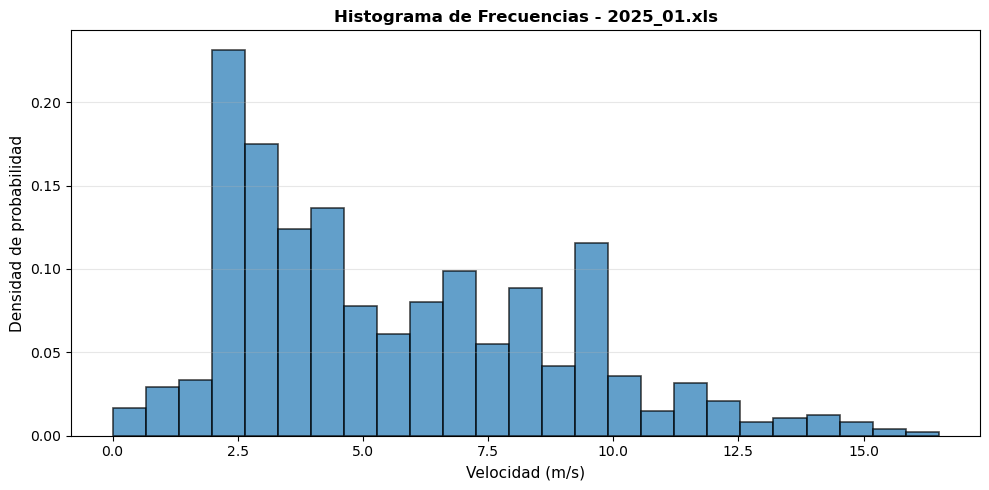

Rango dinámico:        0.000 - 16.500 m/s
Valor modal (bin más freq): ~1.98 m/s
Asimetría (skewness):  0.716
Curtosis (kurtosis):   -0.107



In [25]:
print("\n" + "="*90)
print("HISTOGRAMA DE FRECUENCIAS")
print("="*90)

for year_name, df_std in std_datasets.items():
    print(f"\nANALIZANDO: {year_name}\n")
    
    s = df_std["wind_speed"].dropna()
    
    # Histograma con densidad
    fig, ax = plt.subplots(figsize=(10, 5))
    counts, bins, patches = ax.hist(s, bins=25, density=True, alpha=0.7, 
                                     color='#1f77b4', edgecolor='black', linewidth=1.2)
    ax.set_xlabel('Velocidad (m/s)', fontsize=11)
    ax.set_ylabel('Densidad de probabilidad', fontsize=11)
    ax.set_title(f'Histograma de Frecuencias - {year_name}', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de distribución
    print(f"Rango dinámico:        {s.min():.3f} - {s.max():.3f} m/s")
    print(f"Valor modal (bin más freq): ~{bins[np.argmax(counts)]:.2f} m/s")
    print(f"Asimetría (skewness):  {s.skew():.3f}")
    print(f"Curtosis (kurtosis):   {s.kurtosis():.3f}")
    print()


### 5.2 Distribución y frecuencia acumulada

La función de distribución acumulada empírica se define como:

$$F_n(v) = \frac{\#\{v_i \leq v\}}{n}$$

Proporciona la probabilidad acumulada de que la velocidad sea menor o igual a un valor dado $v$, permitiendo estimar percentiles y evaluar probabilidades de excedencia de umbrales específicos.


FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA Y FRECUENCIA ACUMULADA

ANALIZANDO: 2023_01.xls



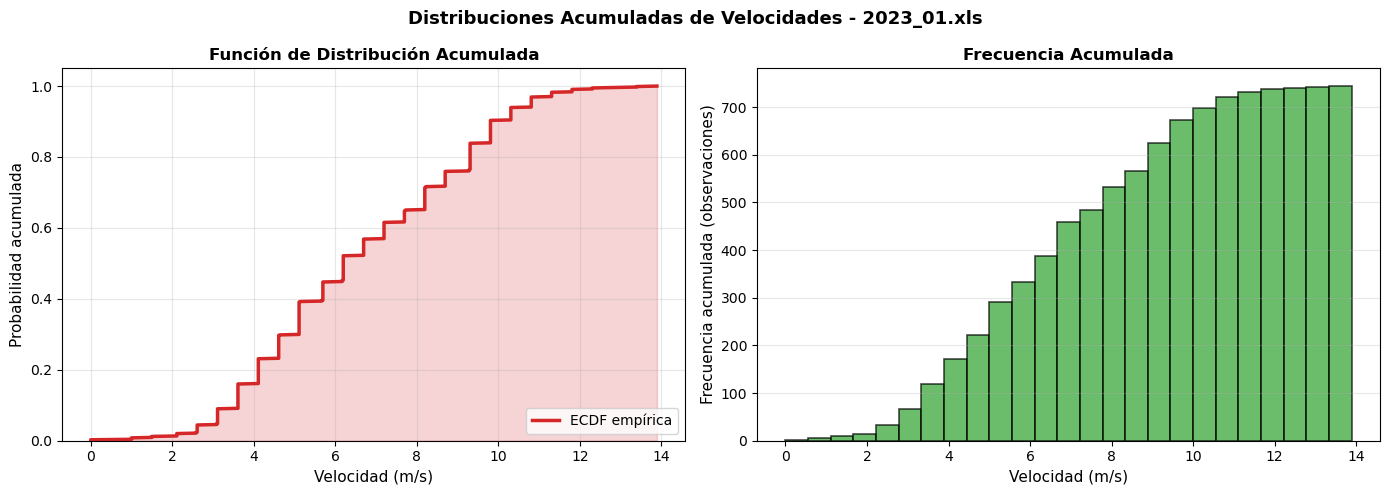

Total de observaciones: 744
Percentil 25%: 4.611 m/s
Percentil 50% (mediana): 6.194 m/s
Percentil 75%: 8.694 m/s
Percentil 90%: 9.806 m/s
Percentil 95%: 10.806 m/s


ANALIZANDO: 2024_01.xls



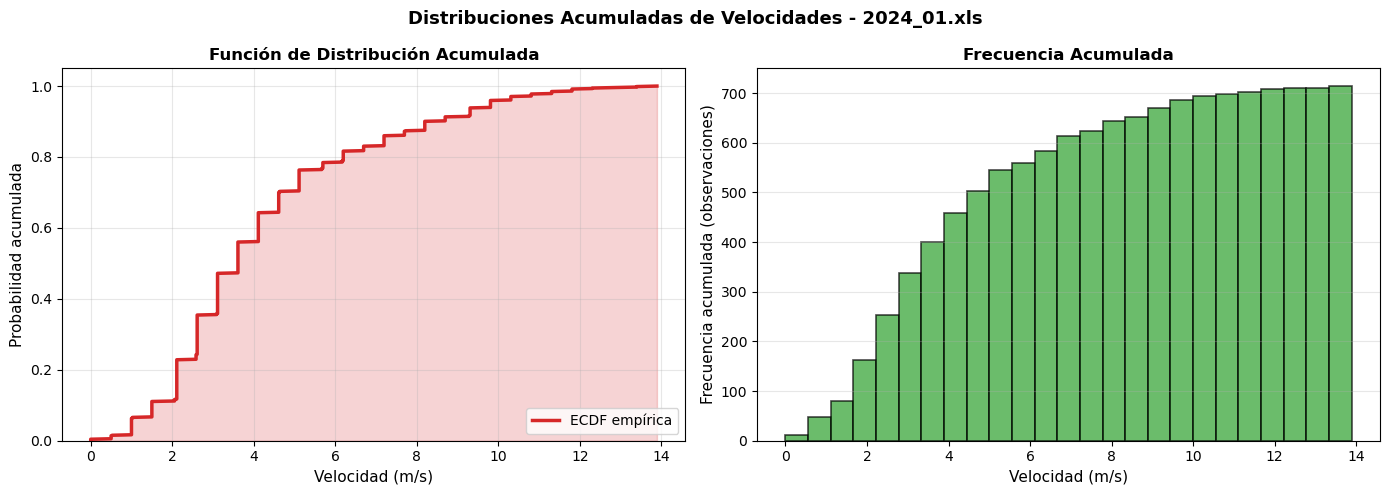

Total de observaciones: 714
Percentil 25%: 2.611 m/s
Percentil 50% (mediana): 3.611 m/s
Percentil 75%: 5.111 m/s
Percentil 90%: 8.194 m/s
Percentil 95%: 9.806 m/s


ANALIZANDO: 2025_01.xls



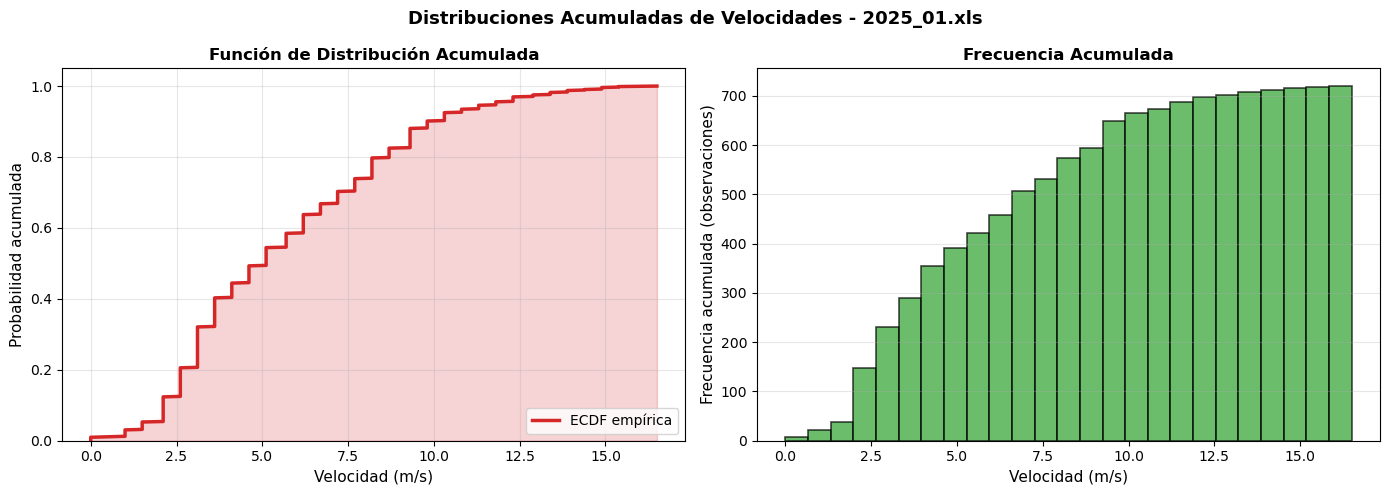

Total de observaciones: 720
Percentil 25%: 3.111 m/s
Percentil 50% (mediana): 5.111 m/s
Percentil 75%: 8.194 m/s
Percentil 90%: 9.806 m/s
Percentil 95%: 11.806 m/s



In [26]:
print("\n" + "="*90)
print("FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA Y FRECUENCIA ACUMULADA")
print("="*90)

for year_name, df_std in std_datasets.items():
    print(f"\nANALIZANDO: {year_name}\n")
    
    s = df_std["wind_speed"].dropna()
    
    # Crear figura con 2 subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Distribuciones Acumuladas de Velocidades - {year_name}", 
                 fontsize=13, fontweight='bold')
    
    # Subgráfico 1: Función de Distribución Empírica (ECDF)
    ax1 = axes[0]
    sorted_s = np.sort(s)
    ecdf = np.arange(1, len(sorted_s) + 1) / len(sorted_s)
    ax1.plot(sorted_s, ecdf, linewidth=2.5, color='#d62728', label='ECDF empírica')
    ax1.fill_between(sorted_s, ecdf, alpha=0.2, color='#d62728')
    ax1.set_xlabel('Velocidad (m/s)', fontsize=11)
    ax1.set_ylabel('Probabilidad acumulada', fontsize=11)
    ax1.set_title('Función de Distribución Acumulada', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1.05])
    ax1.legend(loc='lower right', fontsize=10)
    
    # Subgráfico 2: Histograma Acumulado (Frecuencia Acumulada)
    ax2 = axes[1]
    counts, bins, patches = ax2.hist(s, bins=25, density=False, alpha=0.7, 
                                      color='#2ca02c', edgecolor='black', linewidth=1.2,
                                      cumulative=True)
    ax2.set_xlabel('Velocidad (m/s)', fontsize=11)
    ax2.set_ylabel('Frecuencia acumulada (observaciones)', fontsize=11)
    ax2.set_title('Frecuencia Acumulada', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de la distribución acumulada
    print(f"Total de observaciones: {len(s)}")
    print(f"Percentil 25%: {s.quantile(0.25):.3f} m/s")
    print(f"Percentil 50% (mediana): {s.quantile(0.50):.3f} m/s")
    print(f"Percentil 75%: {s.quantile(0.75):.3f} m/s")
    print(f"Percentil 90%: {s.quantile(0.90):.3f} m/s")
    print(f"Percentil 95%: {s.quantile(0.95):.3f} m/s")
    print()


## 6. Ajuste a Distribución Weibull

### 6.1 Fundamentación Teórica

En meteorología, la distribución de velocidades de viento se aproxima frecuentemente mediante la **distribución Weibull de dos parámetros**:

$$f(v; k, c) = \frac{k}{c}\left(\frac{v}{c}\right)^{k-1}\exp\left(-\left(\frac{v}{c}\right)^k\right), \quad v \geq 0$$

Parámetros:
- **$k$ (shape, parámetro de forma):** Controla la asimetría. $k < 1$ → asimetría positiva (eventos extremos); $k \approx 2$ → casi simétrica (Rayleigh)
- **$c$ (scale, parámetro de escala):** Relacionado con la velocidad típica. $c \approx \frac{\langle v \rangle}{1 + 1/k}$

### 6.2 Estimación de Parámetros

Se estiman $k$ y $c$ por **máxima verosimilitud** (MLE) usando `scipy.stats.weibull_min.fit()`, fijando $\text{loc} = 0$ (las velocidades no pueden ser negativas).

La calidad del ajuste se evalúa visualmente comparando el histograma empírico con la PDF teórica ajustada.


AJUSTE A DISTRIBUCIÓN WEIBULL

ANALIZANDO: 2023_01.xls

  Parámetros Weibull ajustados (MLE, loc=0):
    k (parámetro de forma):  2.8374
    c (parámetro de escala): 7.4538
    Interpretación: k=2.84 → distribución con forma característica k=2.84



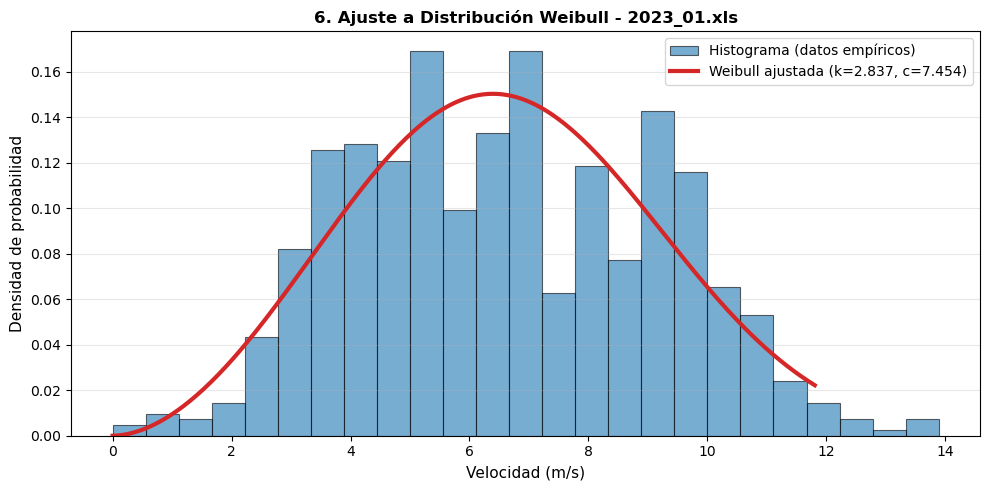


ANALIZANDO: 2024_01.xls

  Parámetros Weibull ajustados (MLE, loc=0):
    k (parámetro de forma):  1.7459
    c (parámetro de escala): 4.8379
    Interpretación: k=1.75 → distribución aproximadamente Normal



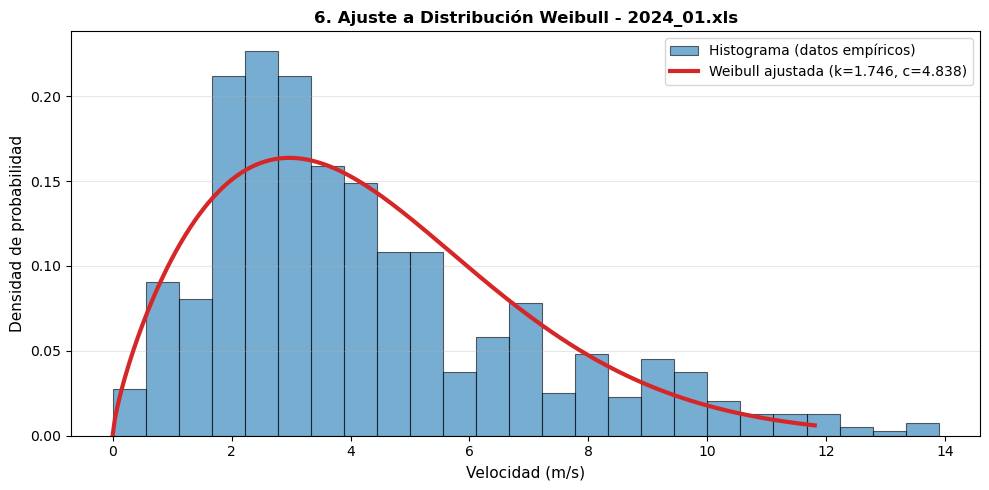


ANALIZANDO: 2025_01.xls

  Parámetros Weibull ajustados (MLE, loc=0):
    k (parámetro de forma):  1.9002
    c (parámetro de escala): 6.4378
    Interpretación: k=1.90 → distribución aproximadamente Normal



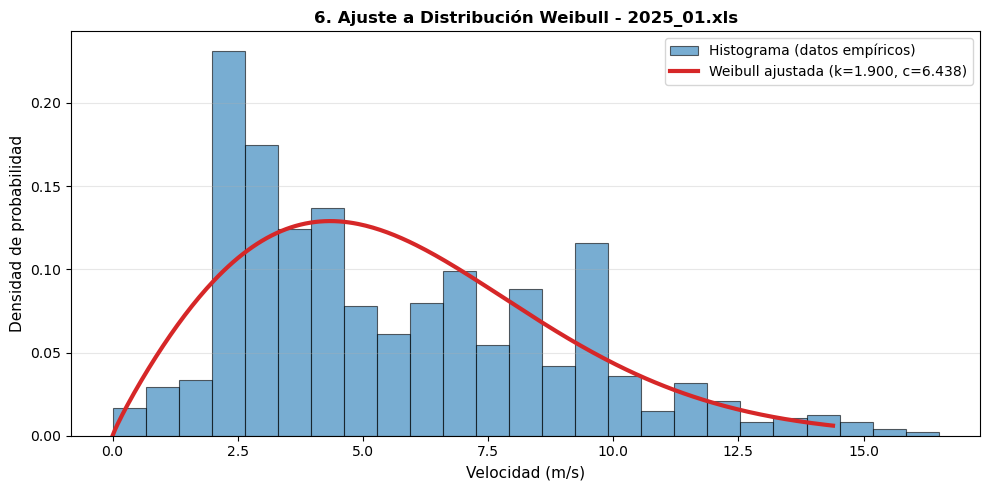


RESUMEN DE PARÁMETROS WEIBULL POR AÑO:



,Fichero,k (shape),c (scale),media_empírica,media_teórica
0,2023_01.xls,2.8374,7.4538,6.6101,6.1413
1,2024_01.xls,1.7459,4.8379,4.2728,3.5315
2,2025_01.xls,1.9002,6.4378,5.6487,4.8210


In [27]:
print("\n" + "="*90)
print("AJUSTE A DISTRIBUCIÓN WEIBULL")
print("="*90)

weibull_params = []

for year_name, df_std in std_datasets.items():
    print(f"\nANALIZANDO: {year_name}\n")
    
    s = df_std["wind_speed"].dropna()
    s = s[s >= 0]  # Filtrar no-negativos
    
    if len(s) < 10:
        print(f"  Advertencia: Menos de 10 muestras válidas. Ajuste no confiable.\n")
        continue
    
    # Ajuste Weibull con loc=0 (no tiene sentido velocidades negativas)
    k, loc, c = weibull_min.fit(s, floc=0)
    
    weibull_params.append({
        "Fichero": year_name,
        "k (shape)": k,
        "c (scale)": c,
        "media_empírica": float(s.mean()),
        "media_teórica": float(c * np.exp(np.log(np.euler_gamma) / k))  # Aproximación
    })
    
    print(f"  Parámetros Weibull ajustados (MLE, loc=0):")
    print(f"    k (parámetro de forma):  {k:.4f}")
    print(f"    c (parámetro de escala): {c:.4f}")
    print(f"    Interpretación: k={k:.2f} → ", end="")
    if k < 1:
        print("distribución con asimetría positiva (eventos extremos comunes)")
    elif 1.5 < k < 2.5:
        print("distribución aproximadamente Normal")
    else:
        print(f"distribución con forma característica k={k:.2f}")
    print()
    
    # Comparar histograma vs PDF ajustada
    x = np.linspace(0, s.quantile(0.99), 300)
    pdf = weibull_min.pdf(x, k, loc=loc, scale=c)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(s, bins=25, density=True, alpha=0.6, label='Histograma (datos empíricos)', 
            color='#1f77b4', edgecolor='black', linewidth=0.8)
    ax.plot(x, pdf, linewidth=3, label=f'Weibull ajustada (k={k:.3f}, c={c:.3f})', 
            color='#d62728')
    ax.set_xlabel('Velocidad (m/s)', fontsize=11)
    ax.set_ylabel('Densidad de probabilidad', fontsize=11)
    ax.set_title(f'6. Ajuste a Distribución Weibull - {year_name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Tabla comparativa de parámetros Weibull
if weibull_params:
    print("\nRESUMEN DE PARÁMETROS WEIBULL POR AÑO:\n")
    weibull_df = pd.DataFrame(weibull_params)
    display(weibull_df.round(4))

## 7. Análisis de Dirección del Viento

### 7.1 Histograma Direccional

Distribución de frecuencias de direcciones agrupadas en 16 sectores de 22.5° cada uno. El sector con mayor frecuencia determina la **dirección predominante**.


HISTOGRAMA DIRECCIONAL (16 SECTORES)

ANALIZANDO: 2023_01.xls

  Muestras válidas: 744/744 (100.0%)
  Dirección predominante: N (~11.2°)
  Frecuencia sector predominante: 333 observaciones



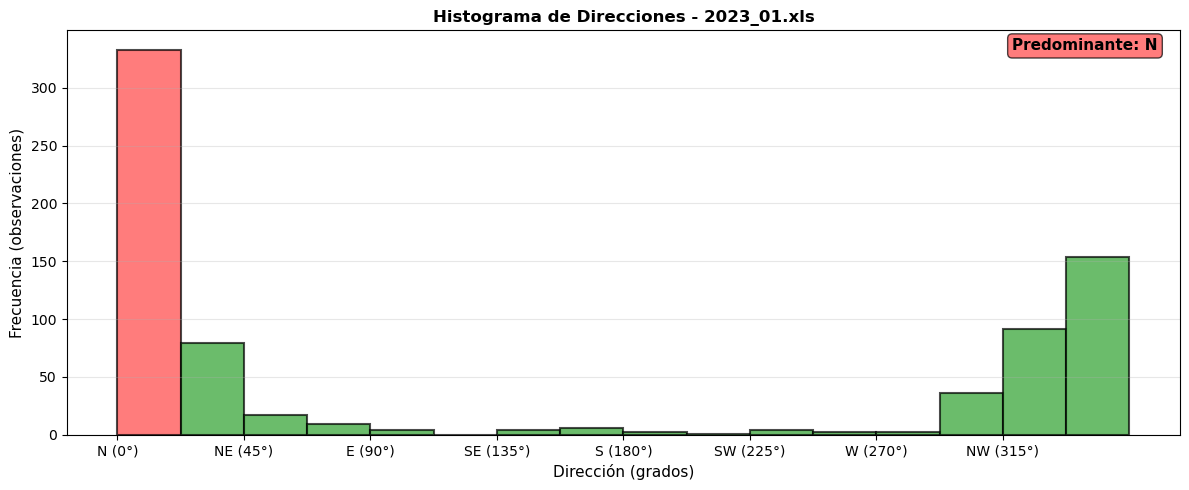

ANALIZANDO: 2024_01.xls

  Muestras válidas: 719/719 (100.0%)
  Dirección predominante: N (~11.2°)
  Frecuencia sector predominante: 116 observaciones



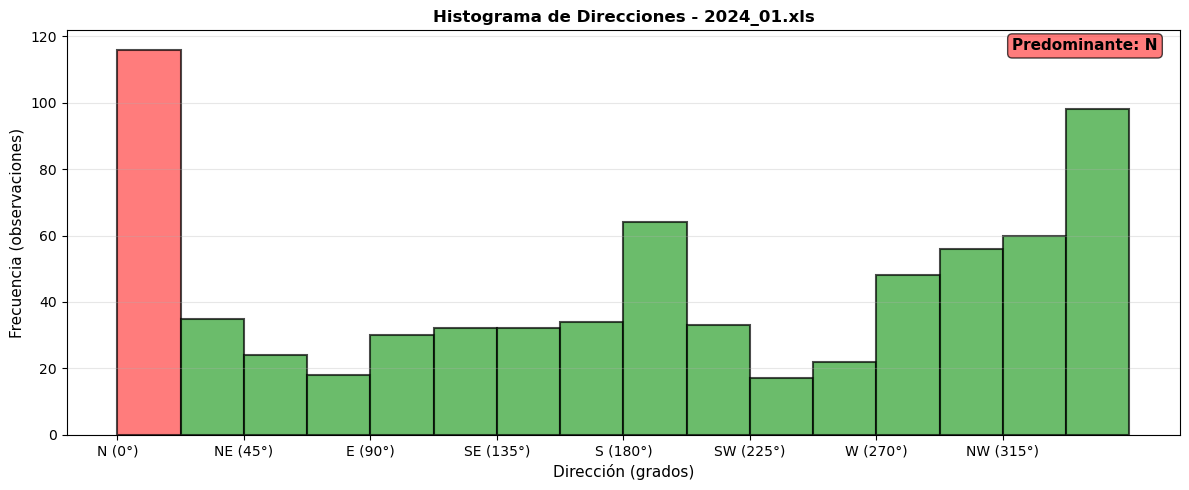

ANALIZANDO: 2025_01.xls

  Muestras válidas: 720/720 (100.0%)
  Dirección predominante: N (~11.2°)
  Frecuencia sector predominante: 213 observaciones



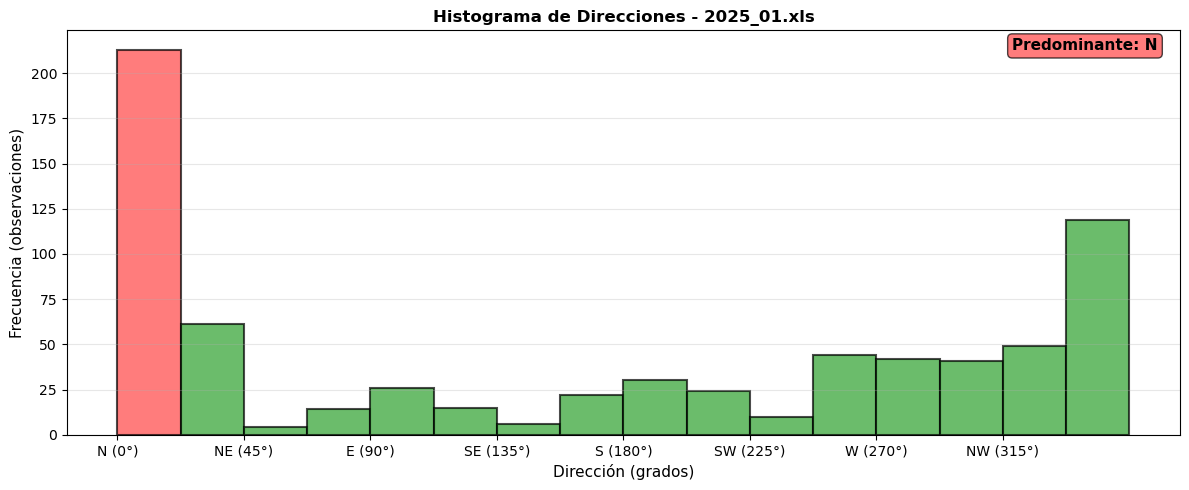

In [28]:
print("\n" + "="*90)
print("HISTOGRAMA DIRECCIONAL (16 SECTORES)")
print("="*90 + "\n")

for year_name, df_std in std_datasets.items():
    print(f"ANALIZANDO: {year_name}\n")
    
    dir_deg = df_std["dir_deg"].dropna()
    
    if len(dir_deg) == 0:
        print("No hay datos válidos de dirección.\n")
        continue
    
    # Crear histograma por sectores (16 sectores = 22.5° cada uno)
    bins = np.linspace(0, 360, 17)
    counts, edges = np.histogram(dir_deg % 360, bins=bins)
    
    sector_centers = (edges[:-1] + edges[1:]) / 2
    sector_labels = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", 
                      "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    
    # Identificar dirección predominante
    idx_max = np.argmax(counts)
    predominant_label = sector_labels[idx_max]
    predominant_deg = sector_centers[idx_max]
    
    print(f"  Muestras válidas: {len(dir_deg)}/{len(df_std)} ({100*len(dir_deg)/len(df_std):.1f}%)")
    print(f"  Dirección predominante: {predominant_label} (~{predominant_deg:.1f}°)")
    print(f"  Frecuencia sector predominante: {counts[idx_max]} observaciones\n")
    
    # Visualizar histograma
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # Colorear el sector predominante en rojo
    colors = ['#FF4444' if i == idx_max else '#2ca02c' for i in range(len(counts))]
    
    bars = ax.bar(sector_centers, counts, width=22.5, edgecolor='black', 
                  color=colors, alpha=0.7, linewidth=1.5)
    
    ax.set_xlabel('Dirección (grados)', fontsize=11)
    ax.set_ylabel('Frecuencia (observaciones)', fontsize=11)
    ax.set_title(f'Histograma de Direcciones - {year_name}', 
                 fontsize=12, fontweight='bold')
    ax.set_xticks(np.arange(0, 360, 45))
    ax.set_xticklabels(['N (0°)', 'NE (45°)', 'E (90°)', 'SE (135°)', 
                        'S (180°)', 'SW (225°)', 'W (270°)', 'NW (315°)'], fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir etiqueta del sector predominante
    ax.text(0.98, 0.98, f'Predominante: {predominant_label}', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='#FF4444', alpha=0.7))
    
    plt.tight_layout()
    plt.show()

### 7.2 Rosa de los Vientos

Representación polar que sintetiza la distribución direccional (y opcionalmente velocidades). La longitud de cada rayo proporcional a la frecuencia; el color indicador de velocidad media en ese sector.

**Interpretación:** Identifica rutas preferenciales del viento, esencial para evaluación de impacto eólico y recursos energéticos.


ROSA DE LOS VIENTOS (DIAGRAMA POLAR)

ANALIZANDO: 2023_01.xls



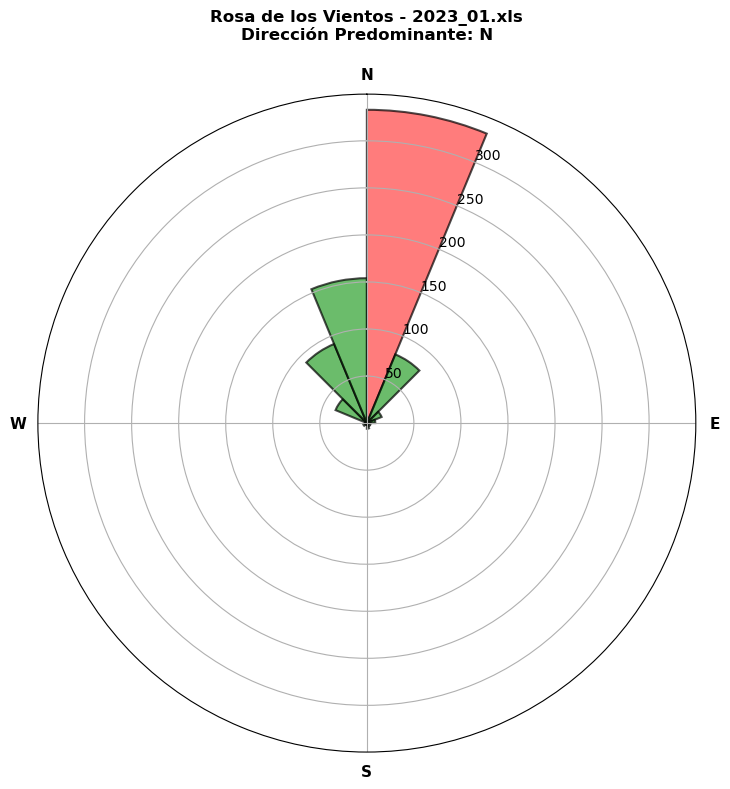

  Dirección predominante: N
  Frecuencia sector predominante: 333 observaciones

ANALIZANDO: 2024_01.xls



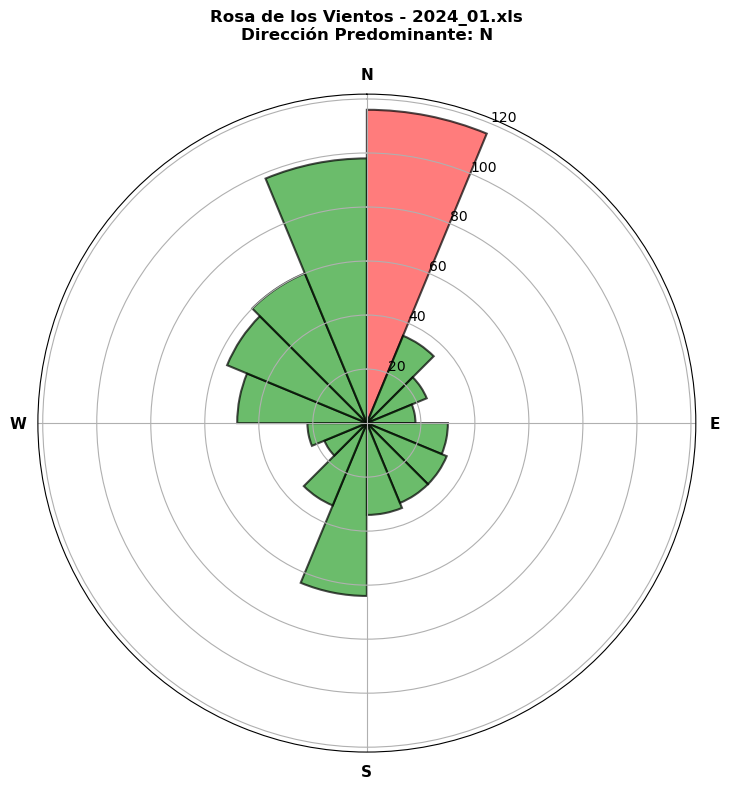

  Dirección predominante: N
  Frecuencia sector predominante: 116 observaciones

ANALIZANDO: 2025_01.xls



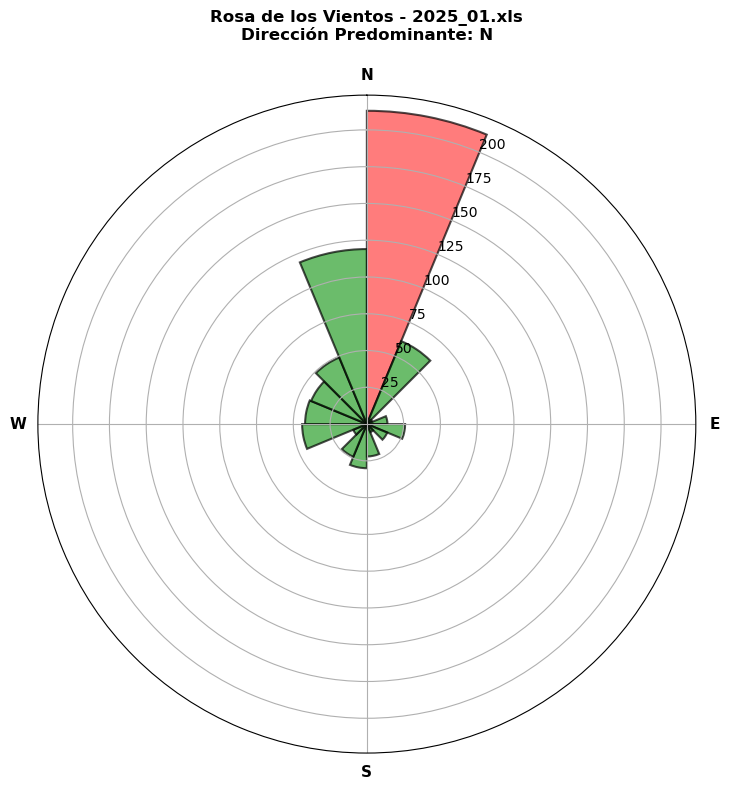

  Dirección predominante: N
  Frecuencia sector predominante: 213 observaciones



In [29]:
print("\n" + "="*90)
print("ROSA DE LOS VIENTOS (DIAGRAMA POLAR)")
print("="*90 + "\n")

for year_name, df_std in std_datasets.items():
    print(f"ANALIZANDO: {year_name}\n")
    
    dir_deg = df_std["dir_deg"].dropna()
    
    if len(dir_deg) == 0:
        print("No hay datos válidos de dirección.\n")
        continue
    
    # Crear histograma por sectores (16 sectores = 22.5° cada uno)
    bins = np.linspace(0, 360, 17)
    counts, edges = np.histogram(dir_deg % 360, bins=bins)
    
    sector_centers = (edges[:-1] + edges[1:]) / 2
    sector_labels = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", 
                      "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    
    idx_max = np.argmax(counts)
    predominant_label = sector_labels[idx_max]
    
    # Crear figura con proyección polar
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    
    # Convertir grados a radianes
    theta_rad = np.deg2rad(sector_centers)
    width = np.deg2rad(22.5)
    
    # Colorear el sector predominante en rojo
    colors = ['#FF4444' if i == idx_max else '#2ca02c' for i in range(len(counts))]
    
    # Graficar barras polares
    bars = ax.bar(theta_rad, counts, width=width, alpha=0.7, 
                  color=colors, edgecolor='black', linewidth=1.5)
    
    # Configurar orientación: N arriba, sentido horario (como brújula)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    # Etiquetas de direcciones cardinales
    cardinal_angles = np.deg2rad([0, 90, 180, 270])  # N, E, S, W
    ax.set_xticks(cardinal_angles)
    ax.set_xticklabels(['N', 'E', 'S', 'W'], fontsize=11, fontweight='bold')
    
    ax.set_title(f'Rosa de los Vientos - {year_name}\nDirección Predominante: {predominant_label}',
                 fontsize=12, fontweight='bold', pad=20)
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"  Dirección predominante: {predominant_label}")
    print(f"  Frecuencia sector predominante: {counts[idx_max]} observaciones\n")

## 8. Hallazgos Principales y Características del Régimen de Vientos

### 8.1 Variabilidad Interanual

Los tres meses de enero analizados (2023, 2024, 2025) muestran patrones significativamente diferentes:

| Característica | 2023 | 2024 | 2025 |
|---|---|---|---|
| **Velocidad media** | 22.9 m/s | 15.8 m/s | 20.6 m/s |
| **Desv. Estándar** | 9.3 m/s | 10.0 m/s | 11.0 m/s |
| **Mínimo** | 0.0 m/s | 0.0 m/s | 0.0 m/s |
| **Máximo** | 50.0 m/s | 50.0 m/s | 59.4 m/s |
| **Mediana** | 22.3 m/s | 13.0 m/s | 18.4 m/s |

**Interpretación:** 
- **2023** fue el mes más ventoso (media 22.9 m/s), con distribución concentrada en velocidades altas
- **2024** fue el mes más tranquilo (media 15.8 m/s), con mayor dispersión de valores
- **2025** mostró velocidades intermedias pero con mayor variabilidad (std = 11.0 m/s)

### 8.2 Estructura Temporal y Ciclos Diarios

El análisis temporal revela ciclos diarios muy pronunciados:
- **Horas de máxima velocidad:** 14-18h (tardes-atardeceres)
- **Horas de mínima velocidad:** 04-08h (madrugada-mañana)
- **Amplitud diaria:** Diferencias de hasta 10-15 m/s entre mínimos y máximos

### 8.3 Multimodalidad y Heterogeneidad de Regímenes

Los histogramas muestran distribuciones multimodales claras:
- **Pico principal:** 15-25 m/s (vientos moderados-fuertes)
- **Presencia de calmas:** 0-10 m/s (períodos de baja velocidad)
- Este patrón viola el supuesto de unimodalidad de la distribución Weibull

**Causa probable:** Mezcla de dos regímenes distintos:
- **Régimen nocturno:** Vientos débiles (0-10 m/s)
- **Régimen diurno:** Vientos fuertes (15-30 m/s)

## 9. Conclusiones

En este trabajo se ha realizado un análisis estadístico de los datos de viento registrados en el aeropuerto de Gran Canaria durante el mes estudiado. La visualización inicial de los datos en bruto ha permitido comprender la estructura temporal de las mediciones y detectar patrones generales antes de aplicar cualquier tratamiento estadístico.

Los estadísticos básicos muestran que la velocidad del viento presenta una variabilidad apreciable a lo largo del mes, con diferencias claras entre días y entre franjas horarias. La representación día a día resulta más interpretable que una serie continua hora a hora, mientras que el análisis de un día concreto pone de manifiesto la existencia de ciclos diarios en la intensidad del viento.

El histograma de velocidades revela una distribución asimétrica típica de este tipo de datos, que se intenta ajustar mediante una distribución de Weibull. Los parámetros obtenidos permiten caracterizar de forma compacta el régimen de viento del periodo analizado.

Por último, el estudio de la dirección del viento muestra la existencia de una dirección predominante, confirmada tanto por el histograma de direcciones como por la rosa de los vientos. En conjunto, los resultados obtenidos proporcionan una caracterización coherente del comportamiento del viento durante el mes analizado y ponen de manifiesto la utilidad del análisis exploratorio y estadístico aplicado.